In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import RobustScaler

In [2]:
def preprocess(directory):
    csv_files=[f for f in os.listdir(directory) if f.endswith('.csv')]
    all_data=[]
    for i in csv_files:
        df=pd.read_csv(os.path.join(directory, i))
        df.columns=['Output1','Output2','Output3','Output4','Output5','Output6','Output7','Output8']
        data=df.iloc[:, :4]
        all_data.append(data)
    my_data=pd.concat(all_data, ignore_index=True)

    return my_data

In [3]:
data=preprocess('datacollected')
data.head(10)

,Output1,Output2,Output3,Output4
0,106777,28469,197308,159105
1,106868,28584,197413,159166
2,107371,28840,197733,159248
3,107598,28883,197849,159265
4,107234,28641,197609,159191
5,106816,28460,197396,159157
6,106925,28585,197523,159230
7,107429,28848,197841,159329
8,107634,28883,197936,159334
9,107271,28635,197698,159258


In [4]:
start_markers = ['start one.png', 'start five.jpg', 'start nine.jpg', 'start six.jpg', 'start zero.png', 'start animal.jpg', 'start four.jpg', 'start eight.jpg', 'start three.jpg', 'start seven.jpg', 'start two.jpg']
end_markers = ['end one.png', 'end five.jpg', 'end nine.jpg', 'end six.jpg', 'end zero.png', 'end animal.jpg', 'end four.jpg', 'end eight.jpg', 'end three.jpg', 'end seven.jpg', 'end two.jpg']

In [5]:
def extract_center_rows(data, start_range, end_range, length):
    if start_range > end_range:
        raise ValueError("start_range should be less than or equal to end_range")

    if end_range - start_range < length:
        return False, 0

    range_data = data.loc[start_range:end_range]
    if length > len(range_data):
        raise ValueError("The specified length is greater than the number of rows in the range")

    center_index = len(range_data) // 2
    start_index = max(0, center_index - length // 2)
    end_index = start_index + length
    center_rows = range_data.iloc[start_index:end_index]

    return True, center_rows

In [6]:
def extract_data_between_markers(data, start_markers, end_markers, datashape):
    X = []
    Y = []
    between_markers = False
    label = None
    start_idx = None
    end_idx = None
    df_temp = []
    segment_lengths = []

    marker_to_label = {
        'start one.png': 1, 'end one.png': 1,
        'start two.jpg': 2, 'end two.jpg': 2,
        'start three.jpg': 3, 'end three.jpg': 3,
        'start four.jpg': 4, 'end four.jpg': 4,
        'start five.jpg': 5, 'end five.jpg': 5,
        'start six.jpg': 6, 'end six.jpg': 6,
        'start seven.jpg': 7, 'end seven.jpg': 7,
        'start eight.jpg': 8, 'end eight.jpg': 8,
        'start nine.jpg': 9, 'end nine.jpg': 9,
        'start zero.png': 0, 'end zero.png': 0,
        'start animal.jpg': -1, 'end animal.jpg': -1
    }

    for index, row in data.iterrows():
        if row.iloc[0] in start_markers:
            label = marker_to_label[row.iloc[0]]
            start_idx = index
            between_markers = True
            df_temp = []
            print(f"Start marker found at index {index}, label {label},{row.iloc[0]}")
        elif row.iloc[0] in end_markers:
            if between_markers and len(df_temp) > 0:
                end_idx = index
                success, extracted_data = extract_center_rows(data, start_idx, end_idx, datashape[0])
                if success:
                    X.append(extracted_data.values.astype(float))
                    Y.append(label)
                    print(f"End marker found at index {index}, segment length {len(df_temp)}")
                segment_lengths.append(len(df_temp))
            between_markers = False
        elif between_markers:
            df_temp.append(row.iloc[:4].values.tolist())

    X = np.array(X)
    Y = np.array(Y)

    print("Total segments found:", len(segment_lengths))
    print("Segment lengths:", segment_lengths)
    print("Number of segments meeting length requirement:", len(X))

    return X, Y

In [7]:
datashape = (1000, 4)

X, Y = extract_data_between_markers(data, start_markers, end_markers, datashape)


print("X shape:", X.shape)
print("Y shape:", Y.shape)

print("Unique labels in Y:", np.unique(Y))

Start marker found at index 2303, label 4,start four.jpg
End marker found at index 3584, segment length 1280
Start marker found at index 4353, label 6,start six.jpg
End marker found at index 5634, segment length 1280
Start marker found at index 6342, label 9,start nine.jpg
End marker found at index 7556, segment length 1213
Start marker found at index 8453, label 0,start zero.png
End marker found at index 9734, segment length 1280
Start marker found at index 10503, label 5,start five.jpg
End marker found at index 11784, segment length 1280
Start marker found at index 12681, label 2,start two.jpg
End marker found at index 13962, segment length 1280
Start marker found at index 14603, label 8,start eight.jpg
End marker found at index 15884, segment length 1280
Start marker found at index 16896, label 1,start one.png
End marker found at index 18062, segment length 1165
Start marker found at index 18959, label -1,start animal.jpg
End marker found at index 20240, segment length 1280
Start ma

**For non-numerical image , y=1**

**For numerical image , y=0**

In [33]:
y_bin=[]
d=0
for i in Y:
    if i == -1:
        y_bin.append(1)
        d=d+1
    else:
        y_bin.append(0)
print(y_bin)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


In [34]:
scaler = RobustScaler()
scaler.fit(X[0])
for i,x in enumerate(X):
    X[i] = scaler.transform(x)

In [35]:
y_resized=[]
x_resized=[]
c=0
for i in range(len(y_bin)):
    if y_bin[i] == 0:
        c=c+1
        if c<=d:
           y_resized.append(0)
           x_resized.append(X[i])
    else:
        y_resized.append(1)
        x_resized.append(X[i])

y_resized=np.array(y_resized)
print(len(y_resized))
x_resized=np.array(x_resized)

38


In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resized,y_resized,test_size=0.2,random_state=42)

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [38]:
model = Sequential([
    keras.layers.Conv1D(32, 2, activation='relu', input_shape=(1000, 4)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(64, 2, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 999, 32)           288       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 499, 32)           0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 498, 64)           4160      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 249, 64)           0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 15936)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [39]:
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_test = np.array(x_test)

In [40]:
history = model.fit(x_train,y_train,epochs=50,validation_split=0.1,validation_data=(x_test, y_test))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 29.6228 - accuracy: 0.4667 - val_loss: 109.6716 - val_accuracy: 0.6250
Epoch 2/50
1/1 [==============================] - 0s 177ms/step - loss: 203.6254 - accuracy: 0.4667 - val_loss: 81.7804 - val_accuracy: 0.6250
Epoch 3/50
1/1 [==============================] - 0s 178ms/step - loss: 127.9918 - accuracy: 0.4667 - val_loss: 25.4177 - val_accuracy: 0.6250
Epoch 4/50
1/1 [==============================] - 0s 204ms/step - loss: 56.3767 - accuracy: 0.4667 - val_loss: 65.8540 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 147ms/step - loss: 53.9404 - accuracy: 0.6333 - val_loss: 88.9482 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 175ms/step - loss: 83.2256 - accuracy: 0.6333 - val_loss: 28.6189 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 173ms/step - loss: 39.8768 - accuracy: 0.6000 - val_loss: 0.8498 - val_accuracy: 0.7500
Epoch 8

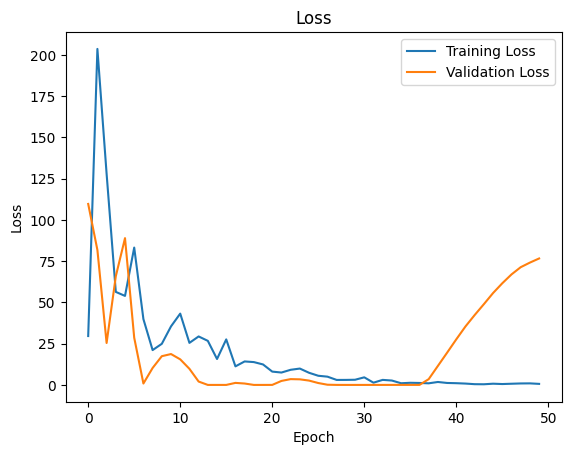

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [42]:
loss, accuracy = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
predicted_classes = (y_pred >= 0.5).astype(int)
for i in range(len(y_pred)):
    print(f"Prediction: {predicted_classes[i]}, True Label: {y_test[i]}")
print(f'Test Accuracy: {accuracy * 100:.2f}%')

1/1 [==============================] - 0s 105ms/step
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Test Accuracy: 87.50%


In [43]:
y_pred=model.predict(x_train)
predicted_classes = (y_pred >= 0.5).astype(int)
for i in range(len(y_pred)):
    print(f"Prediction: {predicted_classes[i]}, True Label: {y_train[i]}")

1/1 [==============================] - 0s 36ms/step
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [1], True Label: 1
Prediction: [0], True Label: 1
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [0], True Label: 0
Prediction: [1], True Label: 1


In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

1/1 [==============================] - 0s 32ms/step


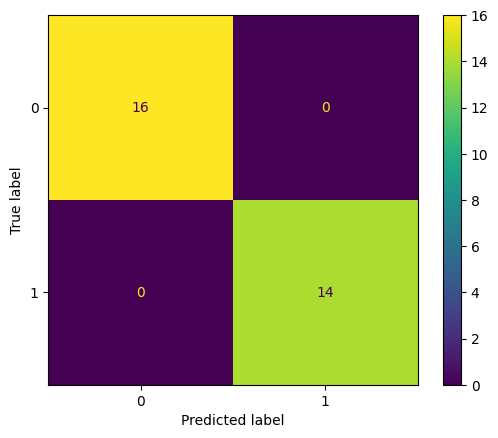

In [45]:
y_pred=model.predict(x_train)
predicted_classes = (y_train >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, predicted_classes,labels=[0,1])

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

1/1 [==============================] - 0s 29ms/step


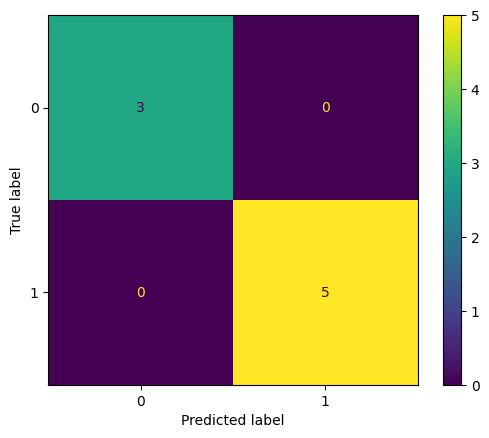

In [47]:
y_pred=model.predict(x_test)
predicted_classes = (y_test >= 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, predicted_classes,labels=[0,1])

disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

In [48]:
from sklearn.metrics import classification_report,precision_score,f1_score

# Assuming y_pred is your model's predictions
y_pred = model.predict(x_train)

# Convert probabilities to class labels
y_pred = (y_pred >= 0.5).astype(int)

# Calculate precision, recall, and F1-score
print(classification_report(y_train, y_pred, target_names=['class 0', 'class 1']))

1/1 [==============================] - 0s 32ms/step
              precision    recall  f1-score   support

     class 0       0.76      1.00      0.86        16
     class 1       1.00      0.64      0.78        14

    accuracy                           0.83        30
   macro avg       0.88      0.82      0.82        30
weighted avg       0.87      0.83      0.83        30

